In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = pd.read_csv('_latency&transpile_time.csv')
data

,pkid,layers,method,backend,transpile_time,latency
0,0,7,penalty,ibm_osaka,0.384648,55459.555556
1,0,7,cyclic,ibm_osaka,0.439461,67022.222222
2,0,1,commute,ibm_osaka,0.324124,58268.444444
3,0,7,HEA,ibm_osaka,0.239148,69660.444444
4,0,7,penalty,ibm_fez,0.252911,13684.000000
5,0,7,cyclic,ibm_fez,0.367153,17068.000000
6,0,1,commute,ibm_fez,0.304581,16744.000000
7,0,7,HEA,ibm_fez,0.188693,15348.000000
8,0,7,penalty,ibm_sherbrooke,0.330136,66780.000000
9,0,7,cyclic,ibm_sherbrooke,0.351080,79200.000000


In [10]:
# data.strategy = data.strategy.apply(lambda x: '1' if x else 'qiskit')
data = data.drop(columns=['layers', 'pkid'])
data

,method,backend,transpile_time,latency
0,penalty,ibm_osaka,0.384648,55459.555556
1,cyclic,ibm_osaka,0.439461,67022.222222
2,commute,ibm_osaka,0.324124,58268.444444
3,HEA,ibm_osaka,0.239148,69660.444444
4,penalty,ibm_fez,0.252911,13684.000000
5,cyclic,ibm_fez,0.367153,17068.000000
6,commute,ibm_fez,0.304581,16744.000000
7,HEA,ibm_fez,0.188693,15348.000000
8,penalty,ibm_sherbrooke,0.330136,66780.000000
9,cyclic,ibm_sherbrooke,0.351080,79200.000000


In [11]:
# 设置索引列
index_columns = ['pkid', 'method', 'backend']
value_columns = [col for col in data.columns if col not in index_columns]
data['backend'] = data['backend'].str.replace('^ibm_', '', regex=True)
data

,method,backend,transpile_time,latency
0,penalty,osaka,0.384648,55459.555556
1,cyclic,osaka,0.439461,67022.222222
2,commute,osaka,0.324124,58268.444444
3,HEA,osaka,0.239148,69660.444444
4,penalty,fez,0.252911,13684.000000
5,cyclic,fez,0.367153,17068.000000
6,commute,fez,0.304581,16744.000000
7,HEA,fez,0.188693,15348.000000
8,penalty,sherbrooke,0.330136,66780.000000
9,cyclic,sherbrooke,0.351080,79200.000000


In [12]:
# probs = ['F1','G1','K1']
# data.pkid = data.pkid.apply(lambda x: probs[x])
# data

In [13]:
data = data.groupby(['backend','method',]).mean()
data

transpile_time        latency
backend    method                                
fez        HEA            0.195854   15148.000000
           commute        0.498259   42950.666667
           cyclic         0.869829   62738.666667
           penalty        0.699749   60244.000000
osaka      HEA            0.251935   69141.333333
           commute        0.583014  180084.148148
           cyclic         0.966072  268610.370370
           penalty        0.842011  219875.555556
sherbrooke HEA            0.238413   81080.000000
           commute        0.626510  222720.000000
           cyclic         0.981484  301640.000000
           penalty        0.802613  304560.000000

In [14]:
data2draw = data.pivot_table(index =['backend'], columns='method', values=['latency'], sort=False)
data2draw

latency                                             
method               HEA        commute         cyclic        penalty
backend                                                              
fez         15148.000000   42950.666667   62738.666667   60244.000000
osaka       69141.333333  180084.148148  268610.370370  219875.555556
sherbrooke  81080.000000  222720.000000  301640.000000  304560.000000

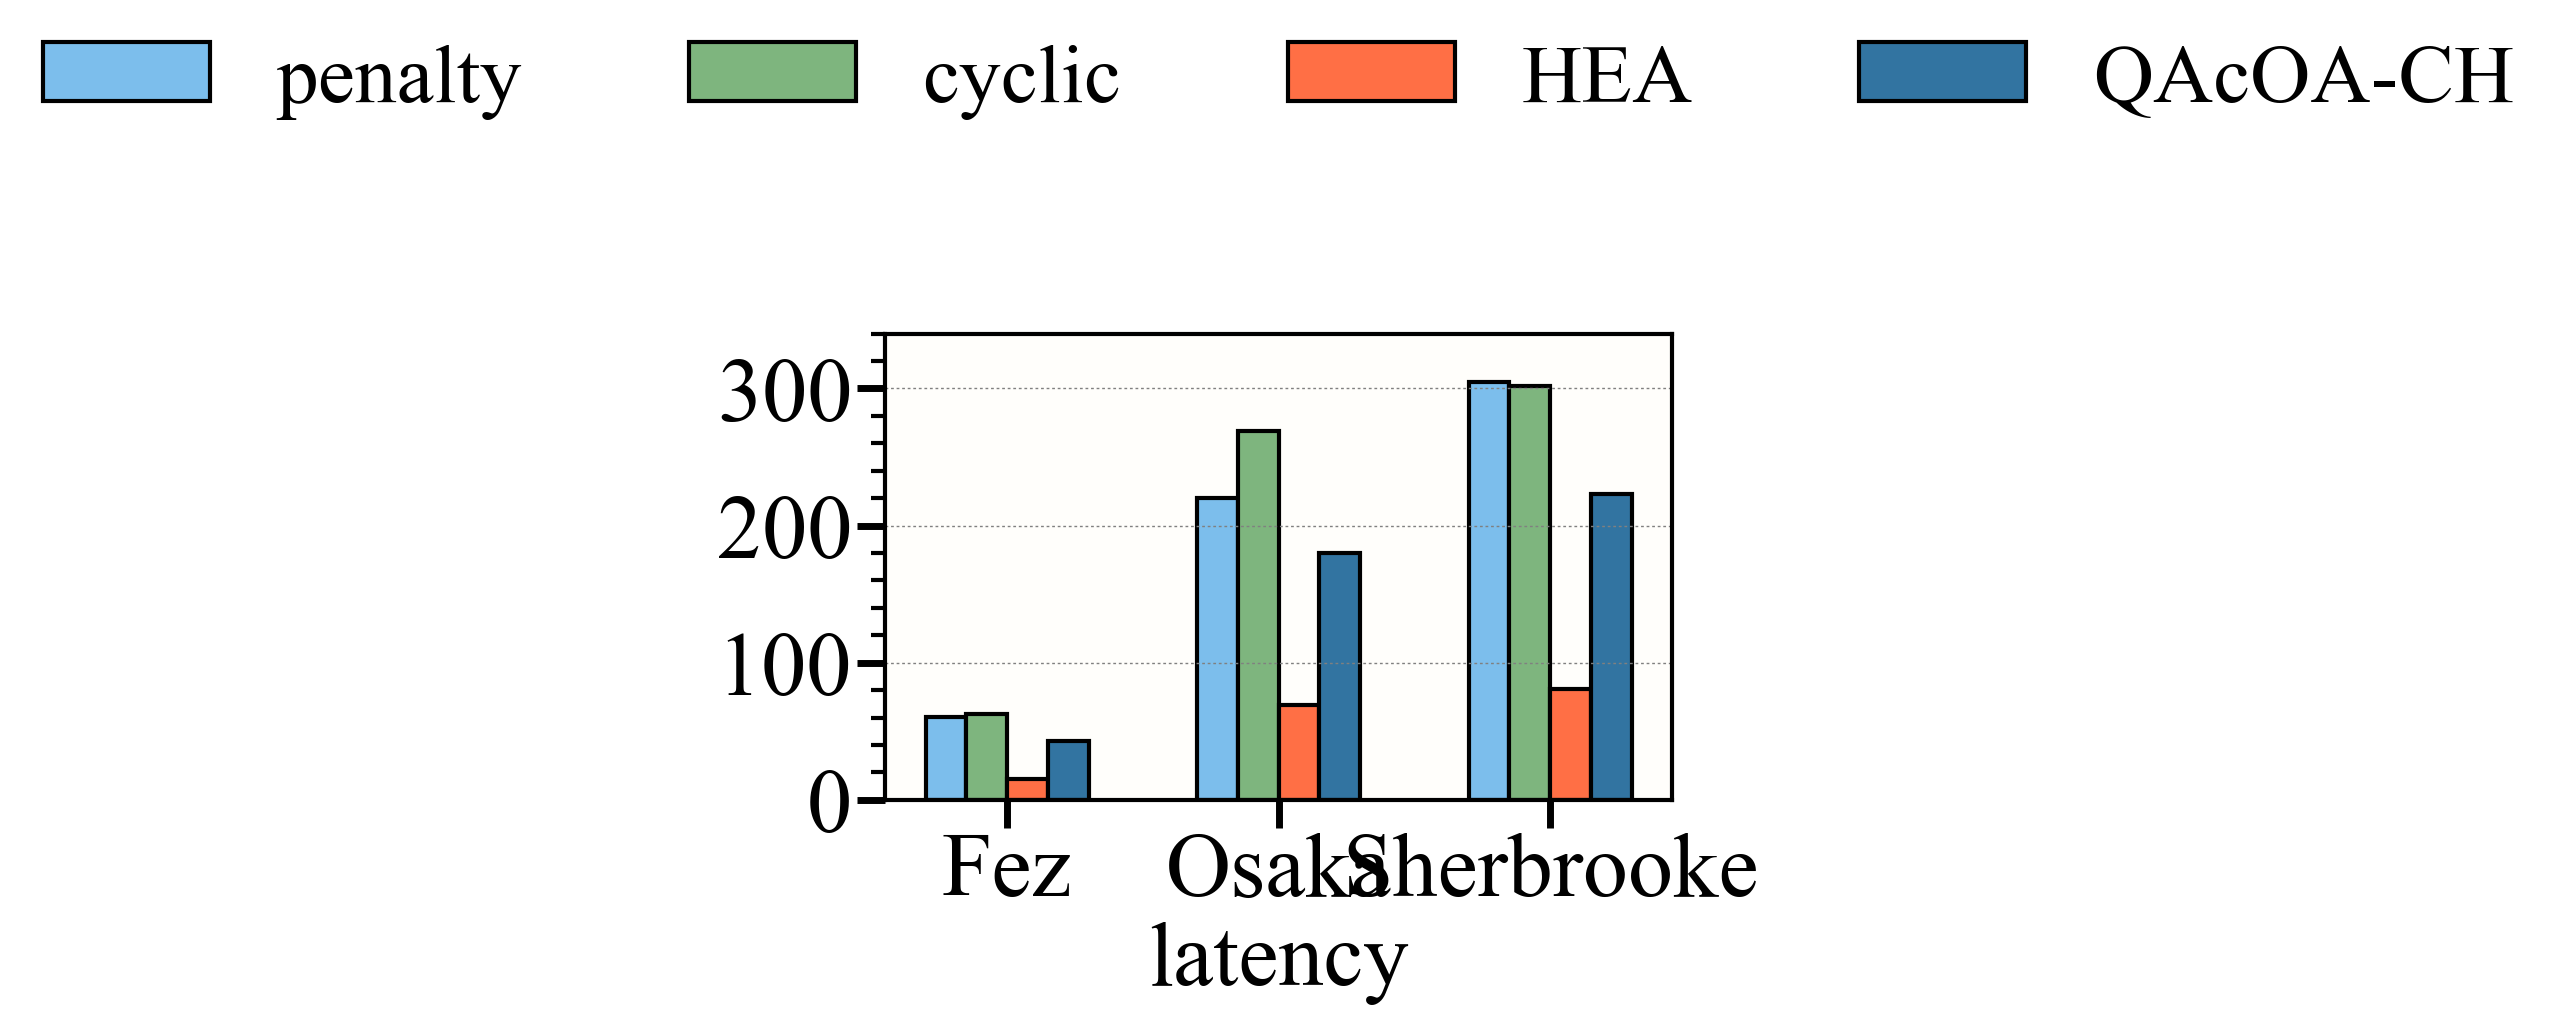

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Initialize the figure and axis settings
scale = 1.05
fig = plt.figure(figsize=(25*scale, 12*scale))
mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 65,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 3,
    'xtick.major.size': 20,
    'xtick.major.width': 5,
    'xtick.minor.size': 10,
    'xtick.minor.width': 3,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    "lines.markersize" : 35,
    "lines.markeredgewidth" : 2,
    "markers.fillstyle" :  'full',
    'lines.markerfacecolor': '#f8d941',
    'lines.markeredgecolor': 'black',
})

bar_width = 0.12
shrink = 0.2
colors = ["#7CBEEC", "#7EB57E", "#FF6F45", "#3274A1"]
indexs = [i for i in np.arange(0, len(data2draw.index.values))]
for i in range(0, len(indexs) - 1, 3):
    indexs[i] += shrink
    indexs[i + 2] -= shrink
metric = 'latency'
axes = plt.axes([0, 0, 0.30, 0.37])
ylabel = "latency"
ymetric = metric

axes.bar([index - 1.5 * bar_width for index in indexs], data2draw[ymetric]['penalty'] / 1000, width=bar_width, label="penalty", color=colors[0], linewidth=3, edgecolor='black')
axes.bar([index - 0.5 * bar_width for index in indexs], data2draw[ymetric]['cyclic'] / 1000, width=bar_width, label="cyclic", color=colors[1], linewidth=3, edgecolor='black')
axes.bar([index + 0.5 * bar_width for index in indexs], data2draw[ymetric]['HEA'] / 1000, width=bar_width, label="HEA", color=colors[2], linewidth=3, edgecolor='black')
axes.bar([index + 1.5 * bar_width for index in indexs], data2draw[ymetric]['commute'] / 1000, width=bar_width, label="QAcOA-CH", color=colors[3], linewidth=3, edgecolor='black')
axes.set_xticks(indexs, minor=False)
axes.set_xticklabels(["Fez", "Osaka", "Sherbrooke"])
axes.set_xlabel("latency")
axes.grid(axis="y", color="gray", linestyle="--", linewidth=1, dashes=(2, 2))
axes.set_facecolor("#fffef877")
axes.set_xlim(0 - 3 * bar_width + shrink, 2 + 3 * bar_width - shrink)
axes.set_yticks(range(0, 350, 100), minor=False)
axes.set_yticks([x / 5 for x in range(0, 350 * 5, 100)], minor=True)
    # axes.set_yscale('log')
axes.legend(frameon=False, bbox_to_anchor=(0.5, 1.3), loc='lower center', ncol=4, prop={'size': 60})
# fig.legend([line_improvement, line_speedup], ['improvement', 'speedup'], frameon=False, loc='lower center', ncol=4, prop={'size': 60}, bbox_to_anchor=(0.45, 1.35))
# plt.tight_layout()
plt.savefig("latency.svg", bbox_inches="tight")
